In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 20000)
# Base folder for the Instacart dataset
BASE_PATH = "C:\\Users\\Porfirio\\Desktop\\proj3\\comp541Proj\\"
#BASE_PATH = "drive/MyDrive/COMP 541/instacart-market-basket-analysis/"

# 1. Orders data
df_orders = pd.read_csv(f"{BASE_PATH}orders.csv")

# 2. Products data
df_products = pd.read_csv(f"{BASE_PATH}products.csv")

# 3. Departments data
df_departments = pd.read_csv(f"{BASE_PATH}departments.csv")

#4. Aisles
df_aisles = pd.read_csv(f"{BASE_PATH}aisles.csv")

#5. Order Products Train
df_order_products_train = pd.read_csv(f"{BASE_PATH}order_products__train.csv")

In [10]:
display(df_departments)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Ideas/Questions to ask:

What day of the week do people buy alcohol the most????

Do items purchased influence a person's chance of ordering on instacart again?
-NOT FEASIBLE BECASUE NOT ALL ORDERS ARE IN DATASET


What else do you buy if you’re sick?




***PEOPLE USE INSTACART TO BUY PRODUCE AFTER ABOUT A MONTH OF NOT USING IT***

In [17]:
#Show all products that have aisle_id 11
df_aisles[df_aisles['aisle_id'] == 11]
#expand the products column to show full product names when display is called
pd.set_option('display.max_colwidth', None)
display(df_products[df_products['aisle_id'] == 11])

,product_id,product_name,aisle_id,department_id
5,6,Dry Nose Oil,11,11
12,13,Saline Nasal Mist,11,11
202,203,"Rescue Remedy, Spray",11,11
254,255,"Cold Remedy, Quick Dissolve Tablets, Cherry Flavor",11,11
360,361,Day and Night Multi-Symptom and Severe Cold & Cough Pain Reliever/Fever Reducer,11,11
412,413,Dual Action Beta Immune and Anti-Oxidant Effervescent Citrus,11,11
460,461,Sore Throat Wild Cherry Lozenges,11,11
576,577,Liqui-Gels Softgels Dye-Free Allergy,11,11
602,603,NasaFlo Neti Pot Sinus Relief with Premixed,11,11
758,759,Pain Reliever and Fever Reducer Cherry Infant Drops,11,11


In [18]:
#Get top 100 products ordered from aisle_id 11
df_top_100_aisle_11 = df_products[df_products['aisle_id'] == 11].merge(
    df_order_products_train[['order_id', 'product_id']], on='product_id', how='left'
)
#Grouping by product name and counting the number of orders
df_top_100_aisle_11 = df_top_100_aisle_11.groupby('product_name').agg({'order_id': 'count'}).reset_index()
#Creating new DF to store the top 10 products
df_top_100_aisle_11 = df_top_100_aisle_11.sort_values(by='order_id', ascending=False).head(100)
#Renaming the columns
df_top_100_aisle_11.rename(columns={'order_id': 'total_orders'}, inplace=True)
#Sorting the dataframe by total orders in descending order
df_top_100_aisle_11 = df_top_100_aisle_11.sort_values(by='total_orders', ascending=False)
#Display the resulting DataFrame
display(df_top_100_aisle_11)
# 


,product_name,total_orders
326,Oscillo Oscillococcinum Quick-Dissolving Pellets,55
396,The Original Natural Herb Drops Cough Suppressant,34
141,Coldcalm Homeopathic Tablets,32
77,Cherry Honey Soothing Relief Drops,31
212,Honey Lemon Menthol Drops Cough Suppressant/Oral Anesthetic,31
51,Allergy Relief Spray,29
15,24 Hour Non-Drowsy Allergy Relief,27
215,Honey-Herb Drops Cough Suppressant,23
101,Children's Pain and Fever Grape Splash Liquid,21
238,LemonMint Herb Throat Drops,16


In [19]:
#Get orders that have aisle_id 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['product_id'].isin(df_products[df_products['aisle_id'] == 11]['product_id'])]
#Remove product_id column from the dataframe
df_aisle_11_orders = df_aisle_11_orders.drop(columns=['product_id'])
display(df_aisle_11_orders)

,order_id,add_to_cart_order,reordered
89,112,9,0
732,2415,6,0
799,2820,3,0
1579,4250,1,0
2915,6880,2,1
3847,9322,22,1
6254,15430,1,0
7931,19204,14,0
8212,19739,1,1
10564,25501,5,1


In [20]:
# Filter orders that have products from aisle 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['product_id'].isin(df_products[df_products['aisle_id'] == 11]['product_id'])]

# Get all products from the orders that contain products from aisle 11
df_all_products_in_aisle_11_orders = df_order_products_train[df_order_products_train['order_id'].isin(df_aisle_11_orders['order_id'])]

# Merge with df_products to get product details
df_all_products_in_aisle_11_orders = df_all_products_in_aisle_11_orders.merge(
    df_products[['product_id', 'product_name', 'aisle_id']], on='product_id', how='left'
)

# Exclude products from aisle 11
df_non_aisle_11_products = df_all_products_in_aisle_11_orders[df_all_products_in_aisle_11_orders['aisle_id'] != 11]

# Get the top products that are not from aisle 11
df_top_non_aisle_11_products = df_non_aisle_11_products.groupby('product_name').agg({'order_id': 'count'}).reset_index()
df_top_non_aisle_11_products = df_top_non_aisle_11_products.sort_values(by='order_id', ascending=False).head(100)
df_top_non_aisle_11_products.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Display the resulting DataFrame
display(df_top_non_aisle_11_products)

,product_name,total_orders
449,Banana,117
405,Bag of Organic Bananas,74
4069,Organic Strawberries,48
2716,Large Lemon,48
3792,Organic Hass Avocado,41
5468,Strawberries,41
3535,Organic Avocado,41
3963,Organic Raspberries,36
599,Blueberries,32
3545,Organic Baby Spinach,30


In [21]:
#Show the percentage of orders that have aisle_id 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['product_id'].isin(df_products[df_products['aisle_id'] == 11]['product_id'])]
#Get the total number of orders
df_total_orders = df_order_products_train['order_id'].nunique()
#Get the total number of orders that have aisle_id 11
display(df_aisle_11_orders['order_id'].nunique())

1090

In [22]:
# Total number of products ordered with a product from aisle 11
total_products_in_aisle_11_orders = df_all_products_in_aisle_11_orders.shape[0]
#Total number of orders that have aisle_id 11
total_orders_aisle_11 = df_aisle_11_orders['order_id'].nunique()
# Total number of non-aisle 11 products ordered with a product from aisle 11
total_non_aisle_11_products = df_non_aisle_11_products.shape[0]

# Calculate the percentage
percentage_non_aisle_11 = (total_non_aisle_11_products / total_products_in_aisle_11_orders) * 100
# Calculate the percentage for each product
df_top_non_aisle_11_products['percentage'] = (df_top_non_aisle_11_products['total_orders'] / total_orders_aisle_11) * 100

# Sort by percentage in descending order
df_top_non_aisle_11_products = df_top_non_aisle_11_products.sort_values(by='percentage', ascending=False)

# Display the resulting DataFrame
display(df_top_non_aisle_11_products)
# Display the result
print(f"Percentage of products not from aisle 11 but ordered with a product from aisle 11: {percentage_non_aisle_11:.2f}%")

,product_name,total_orders,percentage
449,Banana,117,10.733945
405,Bag of Organic Bananas,74,6.788991
4069,Organic Strawberries,48,4.403670
2716,Large Lemon,48,4.403670
3792,Organic Hass Avocado,41,3.761468
5468,Strawberries,41,3.761468
3535,Organic Avocado,41,3.761468
3963,Organic Raspberries,36,3.302752
599,Blueberries,32,2.935780
3545,Organic Baby Spinach,30,2.752294


Percentage of products not from aisle 11 but ordered with a product from aisle 11: 89.95%


In [23]:
# Display the top products based on total orders
#show percentage of orders that are from the aisle that has the most products ordered
df_top_aisle = df_products.groupby('aisle_id').agg({'product_id': 'count'}).reset_index()
#Creating new DF to store the top 10 aisles
df_top_aisle = df_top_aisle.sort_values(by='product_id', ascending=False).head(10)
#Renaming the columns
df_top_aisle.rename(columns={'product_id': 'total_products'}, inplace=True)
#Sorting the aisles by the number of products ordered
df_top_aisle = df_top_aisle.sort_values(by='total_products', ascending=False)
#Calculating the percentage of orders that are from the aisle that has the most products ordered
df_top_aisle['percentage'] = (df_top_aisle['total_products'] / df_top_aisle['total_products'].sum()) * 100
#Show aisle names and their corresponding product counts
df_top_aisle = df_top_aisle.merge(df_aisles[['aisle_id', 'aisle']], on='aisle_id', how='left')
#Displaying the top aisles
display(df_top_aisle)

,aisle_id,total_products,percentage,aisle
0,100,1258,12.349072,missing
1,45,1246,12.231275,candy chocolate
2,37,1091,10.709728,ice cream ice
3,47,1038,10.189457,vitamins supplements
4,120,1026,10.071660,yogurt
5,107,989,9.708452,chips pretzels
6,94,894,8.775891,tea
7,21,891,8.746442,packaged cheese
8,38,880,8.638461,frozen meals
9,61,874,8.579562,cookies cakes


<Axes: >

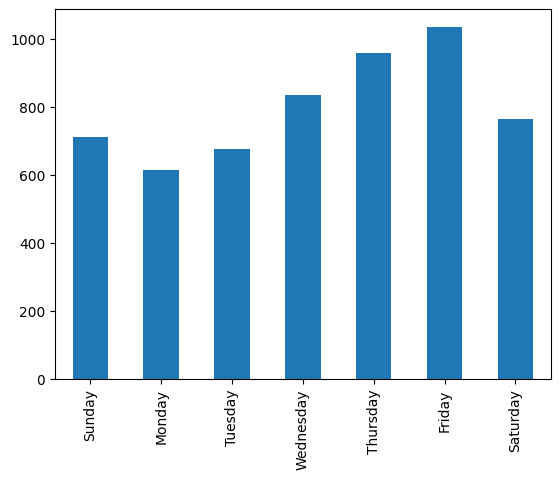

In [24]:
df_order_products_depatments = df_order_products_train.merge(df_products[['product_id', 'department_id']], on='product_id', how='left')
df_order_products_depatments_dow = df_order_products_depatments.merge(df_orders[['order_id', 'order_dow']], on='order_id', how='left')
df_alcohol_orders = df_order_products_depatments_dow[df_order_products_depatments_dow['department_id'] == 5]

dow_al_count = df_alcohol_orders['order_dow'].value_counts()

dow_al_count = dow_al_count.sort_index()
dow_al_count

dow_al_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_al_count

dow_total_count = df_order_products_depatments_dow['order_dow'].value_counts()
dow_total_count = dow_total_count.sort_index()
dow_total_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_total_count

dow_combined = dow_al_count / dow_total_count
dow_combined.plot(kind='bar')

dow_al_count.plot(kind='bar')

In [25]:
df_order_products_depatments_pname = df_order_products_depatments.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
df_order_products_depatments_pname

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name
0,1,49302,1,1,16,Bulgarian Yogurt
1,1,11109,2,1,16,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,10246,3,0,4,Organic Celery Hearts
3,1,49683,4,0,4,Cucumber Kirby
4,1,43633,5,1,15,Lightly Smoked Sardines in Olive Oil
...,...,...,...,...,...,...
1384612,3421063,14233,3,1,7,Natural Artesian Water
1384613,3421063,35548,4,1,20,Twice Baked Potatoes
1384614,3421070,35951,1,1,16,Organic Unsweetened Almond Milk
1384615,3421070,16953,2,1,13,Creamy Peanut Butter


In [26]:
df_alcohol_orders_products = df_order_products_depatments_pname[df_order_products_depatments_pname['department_id'] == 5]
alcohol_orderids = df_alcohol_orders_products['order_id'].unique()
alcohol_orderids

array([   1325,    2985,    3209, ..., 3419893, 3420729, 3420745],
      shape=(3105,))

In [27]:
df_orders_with_alcohol = df_order_products_depatments_pname[df_order_products_depatments_pname['order_id'].isin(alcohol_orderids)]
df_orders_with_alcohol

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name
367,1325,35914,1,1,16,Dha Omega 3 Reduced Fat 2% Milk
368,1325,13176,2,1,4,Bag of Organic Bananas
369,1325,36425,3,1,5,Chardonnay Wine
370,1325,26165,4,0,7,Electrolyte Enhanced Water
371,1325,3664,5,1,7,Slim Can Lime Sparkling Natural Mineral Water
...,...,...,...,...,...,...
1384397,3420729,2667,2,1,17,Dual Action Wipes Citrus
1384398,3420729,28155,3,0,5,Premium Lager Beer
1384399,3420729,14385,4,0,5,Amber Ale
1384410,3420745,47031,1,0,5,Kentucky Straight Bourbon Whiskey


In [30]:
df_with_alcohol = df_orders_with_alcohol[df_orders_with_alcohol['department_id'] != 5]
df_with_alcohol

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name
367,1325,35914,1,1,16,Dha Omega 3 Reduced Fat 2% Milk
368,1325,13176,2,1,4,Bag of Organic Bananas
370,1325,26165,4,0,7,Electrolyte Enhanced Water
371,1325,3664,5,1,7,Slim Can Lime Sparkling Natural Mineral Water
916,2985,4562,2,1,4,English Seedless Cucumber
...,...,...,...,...,...,...
1384085,3419893,22699,12,0,1,Steamfresh Premium Selects Broccoli Florets
1384086,3419893,1110,13,0,1,Broccoli Carrots Sugar Snap Peas & Water Chestnuts
1384396,3420729,46822,1,1,1,Ice
1384397,3420729,2667,2,1,17,Dual Action Wipes Citrus


In [31]:
products_with_al = df_with_alcohol['product_name'].value_counts()
products_with_al_top = products_with_al.head(10)
products_with_al_top

product_name
Banana                    247
Limes                     180
Bag of Organic Bananas    140
Roma Tomato                93
Small Hass Avocado         83
Yellow Onions              82
Large Lemon                77
2% Reduced Fat Milk        70
Fresh CA Grown Eggs        68
Organic Raspberries        67
Name: count, dtype: int64

<Axes: xlabel='product_name'>

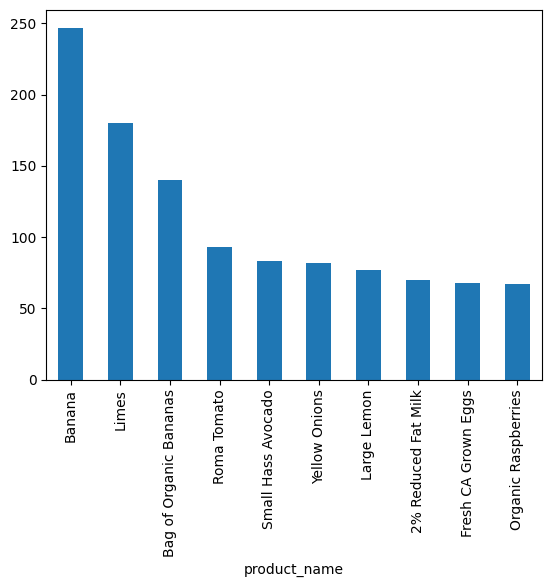

In [32]:
products_with_al_top.plot(kind='bar')

In [33]:
products_with_al_percent = products_with_al / len(alcohol_orderids) * 100
products_with_al_percent_top = products_with_al_percent.head(10)
products_with_al_percent_top

product_name
Banana                    7.954911
Limes                     5.797101
Bag of Organic Bananas    4.508857
Roma Tomato               2.995169
Small Hass Avocado        2.673108
Yellow Onions             2.640902
Large Lemon               2.479871
2% Reduced Fat Milk       2.254428
Fresh CA Grown Eggs       2.190016
Organic Raspberries       2.157810
Name: count, dtype: float64

,aisle,order_count,percentage
53,fresh vegetables,150609,4.402378
50,fresh fruits,150473,4.398402
98,packaged vegetables fruits,78493,2.294390
133,yogurt,55240,1.614693
93,packaged cheese,41699,1.218883
131,water seltzer sparkling water,36617,1.070334
83,milk,32644,0.954201
25,chips pretzels,31269,0.914009
119,soy lactosefree,26240,0.767009
11,bread,23635,0.690863


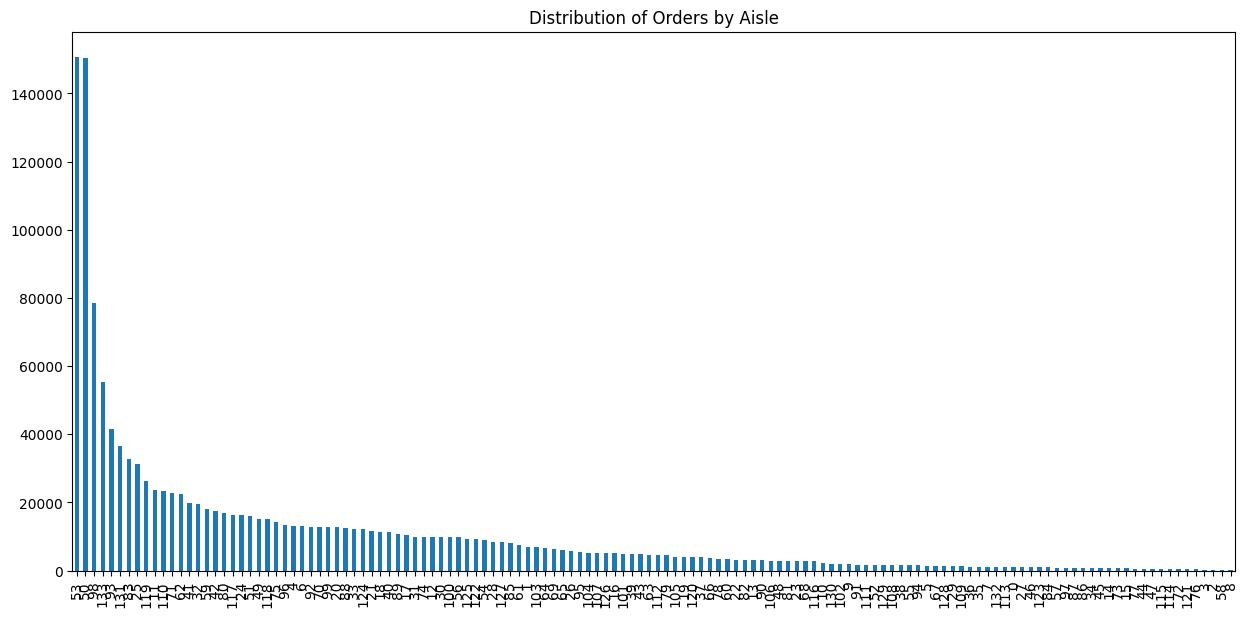

In [40]:
# Merge the DataFrames
merged_df = df_order_products_train.merge(df_products[['product_id', 'aisle_id']], on='product_id', how='left')
merged_df = merged_df.merge(df_aisles[['aisle_id', 'aisle']], on='aisle_id', how='left')

# Group by aisle and count orders
aisle_orders = merged_df.groupby('aisle')['order_id'].count().reset_index()

# Rename columns for better understanding
aisle_orders.rename(columns={'order_id': 'order_count'}, inplace=True)

# Sort by order count in descending order
aisle_orders = aisle_orders.sort_values(by=['order_count'], ascending=False)

# Display the DataFrame


#Show distribution of orders by aisle
aisle_orders['order_count'].plot(kind='bar', figsize=(15, 7), title='Distribution of Orders by Aisle')

#Give percentage of orders by aisle

#Get the total number of orders
total_orders = df_orders['order_id'].nunique()
aisle_orders['percentage'] = (aisle_orders['order_count'] / total_orders) * 100
display(aisle_orders)

In [77]:
#Rename the first column to aisle_id
aisle_orders.rename(columns={'': 'aisle_id'}, inplace=True)
display(aisle_orders)
#Remove fresh vegetables and fresh fruits and packaged vegetables and fruits from the aisle orders dataframe
aisle_orders = aisle_orders[~aisle_orders['aisle_id'].isin(['fresh vegetables', 'fresh fruits', 'packaged vegetables fruits'])]
display(aisle_orders)

,aisle_id,order_count,percentage
133,yogurt,55240,1.614693
93,packaged cheese,41699,1.218883
131,water seltzer sparkling water,36617,1.070334
83,milk,32644,0.954201
25,chips pretzels,31269,0.914009
119,soy lactosefree,26240,0.767009
11,bread,23635,0.690863
110,refrigerated,23228,0.678966
71,ice cream ice,22676,0.662831
62,frozen produce,22453,0.656313


,aisle_id,order_count,percentage
133,yogurt,55240,1.614693
93,packaged cheese,41699,1.218883
131,water seltzer sparkling water,36617,1.070334
83,milk,32644,0.954201
25,chips pretzels,31269,0.914009
119,soy lactosefree,26240,0.767009
11,bread,23635,0.690863
110,refrigerated,23228,0.678966
71,ice cream ice,22676,0.662831
62,frozen produce,22453,0.656313
